In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Activation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import *

3 3 3


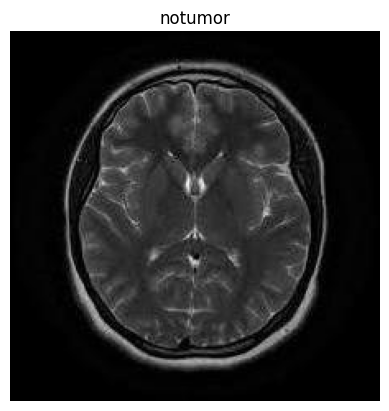

2 2 2


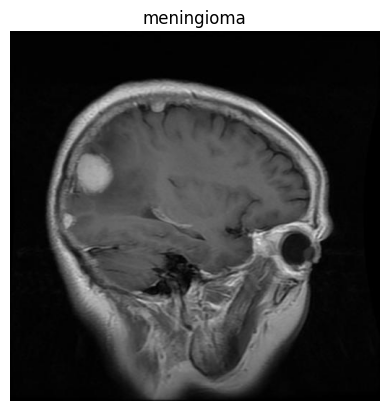

8 8 8


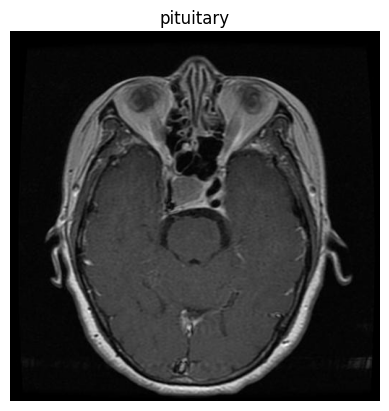

2 2 2


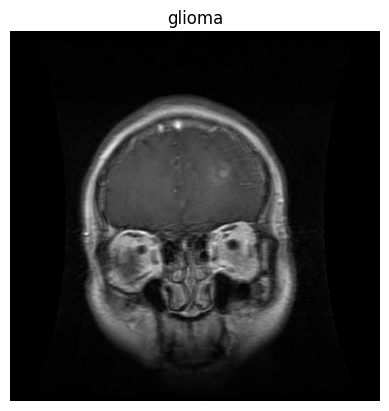

In [2]:
data_dir = 'brain_tumor_data/Training'
categories = os.listdir(data_dir)
for i in categories:
    path = os.path.join(data_dir, i)
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path,j))
        plt.title(i)
        plt.axis('off')
        plt.imshow(img)
        print(img[30,45,0],img[30,45,1],img[30,45,2])
        plt.show()
        break

In [3]:
train_data_dir = 'brain_tumor_data/Training'
test_data_dir="brain_tumor_data/Testing"

In [4]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
labels = os.listdir(train_data_dir)
for i in labels:
    folderPath = os.path.join(train_data_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img[:,:,0])
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(test_data_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img[:,:,0])
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [5]:
X_train.shape

(5711, 224, 224)

In [6]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [8]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

### Baseline model

In [12]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3), input_shape=(224,224,1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(units=252, activation='relu'))
model1.add(Dense(units=4, activation='softmax'))

In [13]:
model1.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=3e-3) ,metrics='accuracy')

In [15]:
model1.fit(X_train,y_train, epochs=30, validation_split=.2)

Epoch 1/30
143/143 [==============================] - 4s 25ms/step - loss: 0.5356 - accuracy: 0.8181 - val_loss: 0.6017 - val_accuracy: 0.8171
Epoch 2/30
143/143 [==============================] - 3s 24ms/step - loss: 0.3502 - accuracy: 0.8844 - val_loss: 0.5401 - val_accuracy: 0.8390
Epoch 3/30
143/143 [==============================] - 3s 23ms/step - loss: 0.2071 - accuracy: 0.9284 - val_loss: 0.5873 - val_accuracy: 0.8556
Epoch 4/30
143/143 [==============================] - 3s 23ms/step - loss: 0.1445 - accuracy: 0.9551 - val_loss: 0.6929 - val_accuracy: 0.8556
Epoch 5/30
143/143 [==============================] - 3s 23ms/step - loss: 0.1122 - accuracy: 0.9652 - val_loss: 0.7334 - val_accuracy: 0.8661
Epoch 6/30
143/143 [==============================] - 3s 23ms/step - loss: 0.0989 - accuracy: 0.9700 - val_loss: 0.8079 - val_accuracy: 0.8714
Epoch 7/30
143/143 [==============================] - 3s 23ms/step - loss: 0.4735 - accuracy: 0.8398 - val_loss: 0.7936 - val_accuracy: 0.7428

In [16]:
print("Test accuracy is:",model1.evaluate(X_test,y_test)[1])

41/41 [==============================] - 0s 11ms/step - loss: 1.0727 - accuracy: 0.8665
Test accuracy is: 0.8665140867233276


### Optimized model

In [19]:
Model = Sequential()
Model.add(Conv2D(32,(3,3),activation="relu", input_shape=(224,224,1)))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3),  activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation="relu",padding="same"))
Model.add(MaxPooling2D((3,3)))
Model.add(Conv2D(256,(3,3), activation="relu",padding="same"))
Model.add(MaxPooling2D((3,3)))
Model.add(Conv2D(512,(3,3), activation="relu",padding="same"))
Model.add(MaxPooling2D((3,3)))
Model.add(Flatten())
Model.add(Dense(128,activation="relu"))
Model.add(Dense(4,activation="softmax"))

In [20]:
Model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=3e-5) ,metrics='accuracy')

In [21]:
Model_es = EarlyStopping(monitor = 'val_loss', patience = 15, verbose = 0)
Model_save = ModelCheckpoint(filepath = 'models/optimized_model_best_weights.h5', monitor = 'val_accuracy', 
                      save_best_only = True, verbose = 1)
Model.fit(X_train,y_train, epochs=50, validation_split=.2, callbacks=[Model_es,Model_save])

Epoch 1/50
143/143 [==============================] - ETA: 0s - loss: 1.2851 - accuracy: 0.6031
Epoch 1: val_accuracy improved from -inf to 0.77515, saving model to models/optimized_model_best_weights.h5
143/143 [==============================] - 9s 42ms/step - loss: 1.2851 - accuracy: 0.6031 - val_loss: 0.6024 - val_accuracy: 0.7752
Epoch 2/50
  1/143 [..............................] - ETA: 4s - loss: 0.5641 - accuracy: 0.7812

/home/shahid/anaconda/envs/tf_env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


143/143 [==============================] - ETA: 0s - loss: 0.5319 - accuracy: 0.8049
Epoch 2: val_accuracy improved from 0.77515 to 0.80052, saving model to models/optimized_model_best_weights.h5
143/143 [==============================] - 5s 33ms/step - loss: 0.5319 - accuracy: 0.8049 - val_loss: 0.5199 - val_accuracy: 0.8005
Epoch 3/50
143/143 [==============================] - ETA: 0s - loss: 0.4046 - accuracy: 0.8538
Epoch 3: val_accuracy improved from 0.80052 to 0.85739, saving model to models/optimized_model_best_weights.h5
143/143 [==============================] - 5s 34ms/step - loss: 0.4046 - accuracy: 0.8538 - val_loss: 0.4063 - val_accuracy: 0.8574
Epoch 4/50
143/143 [==============================] - ETA: 0s - loss: 0.3192 - accuracy: 0.8936
Epoch 4: val_accuracy did not improve from 0.85739
143/143 [==============================] - 5s 33ms/step - loss: 0.3192 - accuracy: 0.8936 - val_loss: 0.3881 - val_accuracy: 0.8460
Epoch 5/50
143/143 [==============================] - 

In [22]:
Model=tf.keras.models.load_model("models/optimized_model_best_weights.h5")

In [23]:
print("Test accuracy is:",Model.evaluate(X_test,y_test)[1])

41/41 [==============================] - 1s 18ms/step - loss: 0.1597 - accuracy: 0.9535
Test accuracy is: 0.9534706473350525


In [40]:
ypred=Model.predict(X_test)

41/41 [==============================] - 0s 7ms/step


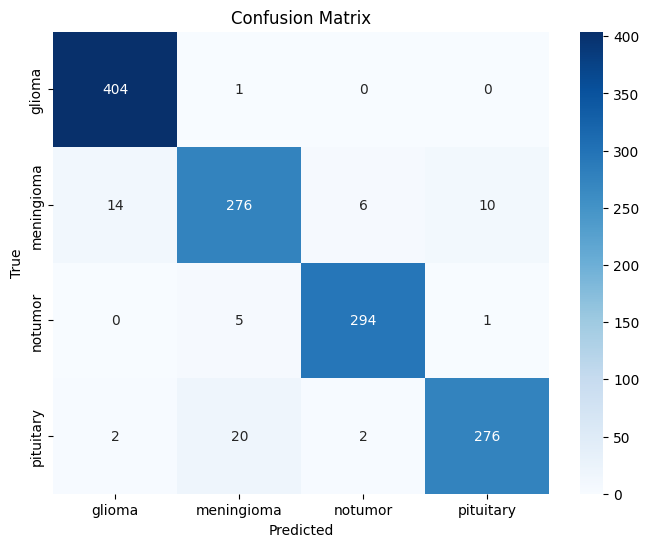


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       405
           1       0.91      0.90      0.91       306
           2       0.97      0.98      0.98       300
           3       0.96      0.92      0.94       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [54]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), ypred.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique([labels[i]for i in y_test.argmax(axis=1)]), yticklabels=np.unique([labels[i]for i in y_test.argmax(axis=1)]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), ypred.argmax(axis=1)))

### Transfer Learning

In [3]:
train_data_dir = 'brain_tumor_data/Training'
test_data_dir="brain_tumor_data/Testing"
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
labels = os.listdir(train_data_dir)
for i in labels:
    folderPath = os.path.join(train_data_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(test_data_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [4]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train,random_state=101)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [18]:
resnet_model=tf.keras.applications.ResNet50(include_top=False,weights="imagenet",input_tensor=None,input_shape=(224,224,3))

for l in resnet_model.layers:
# Freezing the model
  l.trainable = False

In [19]:
TModel = Sequential()
TModel.add(Input(shape=(224,224,3)))
TModel.add(resnet_model)
TModel.add(Flatten())
TModel.add(Dense(16,activation="softplus"))
TModel.add(Dropout(0.4))
TModel.add(Dense(4,activation="softmax"))

In [20]:
TModel.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=3e-5) ,metrics='accuracy')

Model_es = EarlyStopping(monitor = 'val_loss', patience = 15, verbose = 0)
Model_save = ModelCheckpoint(filepath = 'models/optimized_model_best_weights_resnet_tl.h5', monitor = 'val_accuracy', 
                      save_best_only = True, verbose = 1)
TModel.fit(X_train,y_train, epochs=100, validation_split=.2, callbacks=[Model_es,Model_save])

Epoch 1/100
142/143 [============================>.] - ETA: 0s - loss: 0.7013 - accuracy: 0.7192
Epoch 1: val_accuracy improved from -inf to 0.89326, saving model to models/optimized_model_best_weights_resnet_tl.h5
143/143 [==============================] - 14s 81ms/step - loss: 0.6996 - accuracy: 0.7198 - val_loss: 0.2980 - val_accuracy: 0.8933
Epoch 2/100
142/143 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8545
Epoch 2: val_accuracy improved from 0.89326 to 0.91601, saving model to models/optimized_model_best_weights_resnet_tl.h5
143/143 [==============================] - 11s 74ms/step - loss: 0.3396 - accuracy: 0.8551 - val_loss: 0.2428 - val_accuracy: 0.9160
Epoch 3/100
142/143 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.8871
Epoch 3: val_accuracy improved from 0.91601 to 0.92038, saving model to models/optimized_model_best_weights_resnet_tl.h5
143/143 [==============================] - 11s 74ms/step - loss: 0.2586 - accuracy:

In [21]:
print("Test accuracy is:",TModel.evaluate(X_test,y_test)[1])

41/41 [==============================] - 2s 56ms/step - loss: 0.1624 - accuracy: 0.9641
Test accuracy is: 0.9641494750976562
